<a href="https://colab.research.google.com/github/BelugaDex/Image-Processing-and-ML/blob/main/Image_Detection_Cat_Dog_Cow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d biswarajdey/cat-cow-dog-image-detection-for-beginners

Dataset URL: https://www.kaggle.com/datasets/biswarajdey/cat-cow-dog-image-detection-for-beginners
License(s): unknown
  0% 0.00/323k [00:00<?, ?B/s]
100% 323k/323k [00:00<00:00, 143MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/cat-cow-dog-image-detection-for-beginners.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras import datasets, models, layers

In [ ]:
import csv
from PIL import Image
import numpy as np
import os


directories = {
    'cat': '/content/train/cat',
    'cow': '/content/train/cow',
    'dog': '/content/train/dog'
}

csv_file_path = 'animal_images_train_data.csv'

image_data = []
column_names = []

for animal, directory in directories.items():
    for i in range(1, 11):
        image_path = os.path.join(directory, f'{animal}{i}.jpg')
        image = Image.open(image_path)
        image = image.resize((255, 255))
        image_array = np.array(image)
        flattened_image_array = image_array.flatten()
        image_data.append(flattened_image_array)
        column_names.append(f'{animal}{i}')
transposed_image_data = np.array(image_data).T

with open(csv_file_path, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(column_names)
    csvwriter.writerows(transposed_image_data)

print(f"Image data successfully written to {csv_file_path}")


Image data successfully written to animal_images_train_data.csv


In [ ]:
# import pandas as pd
# import numpy as np
# from keras.utils import to_categorical
# csv_file_path = 'animal_images_train_data.csv'
# data = pd.read_csv(csv_file_path)
# column_names = data.columns
# image_data = data.values
# image_data = image_data.T
# num_images = image_data.shape[0]
# images = image_data.reshape((num_images, 255, 255, 3))

# images = images / 255.0

# labels = []
# label_mapping = {'cat': 0, 'dog': 1, 'cow': 2}

# for name in column_names:
#     animal_type = ''.join([char for char in name if not char.isdigit()])
#     labels.append(label_mapping[animal_type])

# labels = np.array(labels)

# labels = to_categorical(labels, num_classes=3)

In [ ]:
import pandas as pd
import numpy as np
from keras.utils import to_categorical

# Load the CSV file
csv_file_path = 'animal_images_train_data.csv'
data = pd.read_csv(csv_file_path)

# Extract the column names (used for labels later)
column_names = data.columns

# Determine the number of images
num_images = data.shape[1]

# Calculate the number of elements each image should have
image_size = 255 * 255 * 3

# Check if the total number of elements matches the expected shape
if data.size != num_images * image_size:
    raise ValueError("The data cannot be reshaped into the shape (num_images, 255, 255, 3)")

# Reshape the image data
images = data.values.T.reshape((num_images, 255, 255, 3))

# Normalize the image data
images = images / 255.0

# Prepare the labels
labels = []
label_mapping = {'cat': 0, 'dog': 1, 'cow': 2}

for name in column_names:
    # Extract the animal type from the column name
    animal_type = ''.join([char for char in name if not char.isdigit()])
    labels.append(label_mapping[animal_type])

# Convert the labels to a NumPy array
labels = np.array(labels)

# One-hot encode the labels
labels = to_categorical(labels, num_classes=3)

print("Images shape:", images.shape)
print("Labels shape:", labels.shape)


Images shape: (30, 255, 255, 3)
Labels shape: (30, 3)


In [ ]:
# CM CM CM
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(255, 255, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 253, 253, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 126, 126, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(images, labels, epochs=20, batch_size=4, validation_split=0.1)

Epoch 1/20
7/7 [==============================] - 2s 197ms/step - loss: 1.4965 - accuracy: 0.4815 - val_loss: 1.1677 - val_accuracy: 0.0000e+00
Epoch 2/20
7/7 [==============================] - 1s 158ms/step - loss: 0.6831 - accuracy: 0.7407 - val_loss: 0.8180 - val_accuracy: 0.6667
Epoch 3/20
7/7 [==============================] - 1s 150ms/step - loss: 0.3571 - accuracy: 0.9630 - val_loss: 0.1766 - val_accuracy: 1.0000
Epoch 4/20
7/7 [==============================] - 1s 140ms/step - loss: 0.1775 - accuracy: 0.9259 - val_loss: 0.3297 - val_accuracy: 1.0000
Epoch 5/20
7/7 [==============================] - 1s 135ms/step - loss: 0.0430 - accuracy: 0.9630 - val_loss: 2.7493 - val_accuracy: 0.0000e+00
Epoch 6/20
7/7 [==============================] - 1s 137ms/step - loss: 0.8294 - accuracy: 0.9259 - val_loss: 0.0590 - val_accuracy: 1.0000
Epoch 7/20
7/7 [==============================] - 1s 137ms/step - loss: 0.1819 - accuracy: 0.9630 - val_loss: 0.8886 - val_accuracy: 0.3333
Epoch 8/20
7

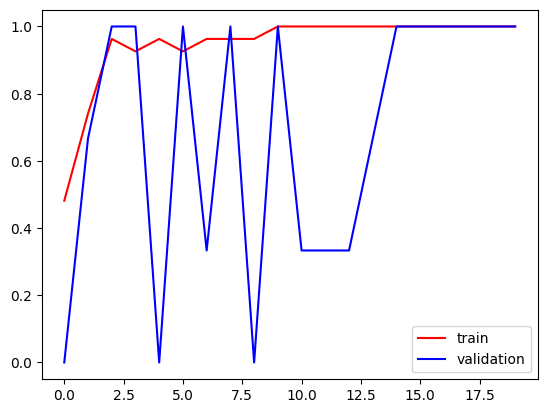

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

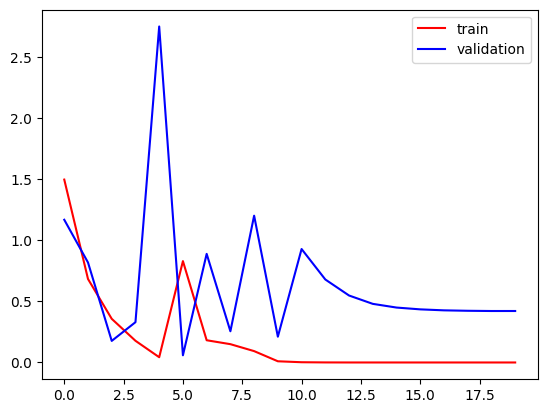

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/test/cow_test/cow_3.jpg')
test_img = cv2.resize(test_img, (255, 255))
test_img = test_img / 255.0
test_input = test_img.reshape((1, 255, 255, 3))
model.predict(test_input)

1/1 [==============================] - 0s 131ms/step


array([[1.5658564e-08, 1.6905205e-05, 9.9998307e-01]], dtype=float32)

In [ ]:
test_img = cv2.imread('/content/test/cat_test/cat_2.jpg')
test_img = cv2.resize(test_img, (255, 255))
test_img = test_img / 255.0
test_input = test_img.reshape((1, 255, 255, 3))
model.predict(test_input)

1/1 [==============================] - 0s 41ms/step


array([[4.3734087e-04, 9.3901300e-01, 6.0549635e-02]], dtype=float32)

In [ ]:
test_img = cv2.imread('/content/test/dog_test/dog_1.jpg')
test_img = cv2.resize(test_img, (255, 255))
test_img = test_img / 255.0
test_input = test_img.reshape((1, 255, 255, 3))
model.predict(test_input)

1/1 [==============================] - 0s 39ms/step


array([[1.2541996e-06, 6.3852227e-01, 3.6147651e-01]], dtype=float32)

In [ ]:
# CCM CCM CCM
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(255, 255, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 253, 253, 32)      896       
                                                                 
 conv2d_4 (Conv2D)           (None, 251, 251, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 125, 125, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 123, 123, 64)      18496     
                                                                 
 conv2d_6 (Conv2D)           (None, 121, 121, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 60, 60, 64)        0         
 g2D)                                                 

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(images, labels, epochs=80, batch_size=4, validation_split=0.1)

Epoch 1/80
7/7 [==============================] - 4s 341ms/step - loss: 1.1721 - accuracy: 0.2593 - val_loss: 1.1743 - val_accuracy: 0.0000e+00
Epoch 2/80
7/7 [==============================] - 2s 296ms/step - loss: 0.9850 - accuracy: 0.5556 - val_loss: 1.2616 - val_accuracy: 0.0000e+00
Epoch 3/80
7/7 [==============================] - 2s 292ms/step - loss: 0.6642 - accuracy: 0.7037 - val_loss: 0.7455 - val_accuracy: 0.6667
Epoch 4/80
7/7 [==============================] - 2s 305ms/step - loss: 0.6001 - accuracy: 0.7407 - val_loss: 1.4545 - val_accuracy: 0.0000e+00
Epoch 5/80
7/7 [==============================] - 2s 308ms/step - loss: 0.2616 - accuracy: 0.8519 - val_loss: 1.3032 - val_accuracy: 0.3333
Epoch 6/80
7/7 [==============================] - 2s 281ms/step - loss: 0.1392 - accuracy: 1.0000 - val_loss: 2.0704 - val_accuracy: 0.3333
Epoch 7/80
7/7 [==============================] - 2s 299ms/step - loss: 1.4359 - accuracy: 0.7778 - val_loss: 0.2032 - val_accuracy: 1.0000
Epoch 8/

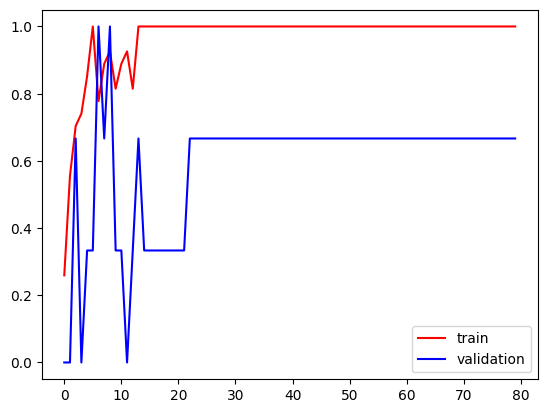

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

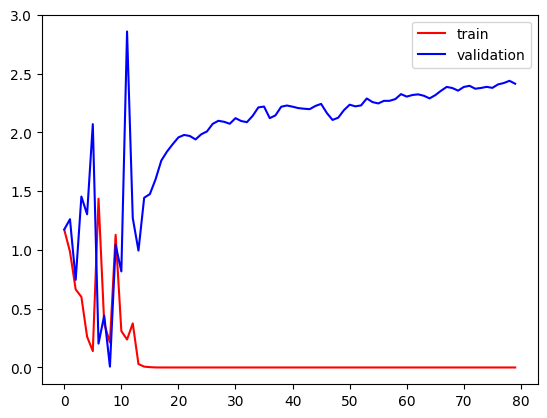

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/test/cat_test/cat_1.jpg')
test_img = cv2.resize(test_img, (255, 255))
test_img = test_img / 255.0
test_input = test_img.reshape((1, 255, 255, 3))
model.predict(test_input)

1/1 [==============================] - 0s 128ms/step


array([[4.0050187e-21, 9.9505794e-01, 4.9420190e-03]], dtype=float32)

In [ ]:
test_img = cv2.imread('/content/test/cow_test/cow_2.jpg')
test_img = cv2.resize(test_img, (255, 255))
test_img = test_img / 255.0
test_input = test_img.reshape((1, 255, 255, 3))
model.predict(test_input)

1/1 [==============================] - 0s 42ms/step


array([[5.3386267e-12, 7.5304380e-04, 9.9924695e-01]], dtype=float32)

In [ ]:
test_img = cv2.imread('/content/test/dog_test/dog_3.jpg')
test_img = cv2.resize(test_img, (255, 255))
test_img = test_img / 255.0
test_input = test_img.reshape((1, 255, 255, 3))
model.predict(test_input)

1/1 [==============================] - 0s 39ms/step


array([[1.1259661e-14, 1.1170950e-03, 9.9888295e-01]], dtype=float32)

In [ ]:
# CCCM CCCM CCCM
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(255, 255, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 253, 253, 32)      896       
                                                                 
 conv2d_10 (Conv2D)          (None, 251, 251, 32)      9248      
                                                                 
 conv2d_11 (Conv2D)          (None, 249, 249, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 124, 124, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 122, 122, 64)      18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 120, 120, 64)      36928     
                                                      

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(images, labels, epochs=80, batch_size=4, validation_split=0.1)

Epoch 1/80
7/7 [==============================] - 5s 453ms/step - loss: 1.0575 - accuracy: 0.4444 - val_loss: 1.1621 - val_accuracy: 0.0000e+00
Epoch 2/80
7/7 [==============================] - 3s 418ms/step - loss: 1.1312 - accuracy: 0.3704 - val_loss: 1.1669 - val_accuracy: 0.0000e+00
Epoch 3/80
7/7 [==============================] - 3s 399ms/step - loss: 1.1022 - accuracy: 0.2222 - val_loss: 1.1018 - val_accuracy: 0.0000e+00
Epoch 4/80
7/7 [==============================] - 3s 405ms/step - loss: 1.0861 - accuracy: 0.3704 - val_loss: 1.2090 - val_accuracy: 0.0000e+00
Epoch 5/80
7/7 [==============================] - 3s 396ms/step - loss: 0.8708 - accuracy: 0.4815 - val_loss: 1.4027 - val_accuracy: 0.0000e+00
Epoch 6/80
7/7 [==============================] - 3s 422ms/step - loss: 0.8813 - accuracy: 0.7037 - val_loss: 1.1040 - val_accuracy: 0.0000e+00
Epoch 7/80
7/7 [==============================] - 3s 410ms/step - loss: 0.6192 - accuracy: 0.8148 - val_loss: 0.0878 - val_accuracy: 1.0

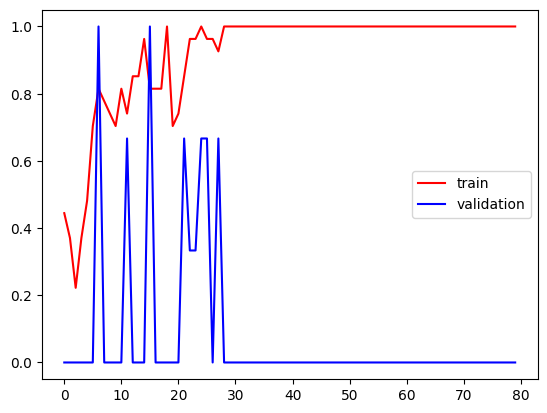

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

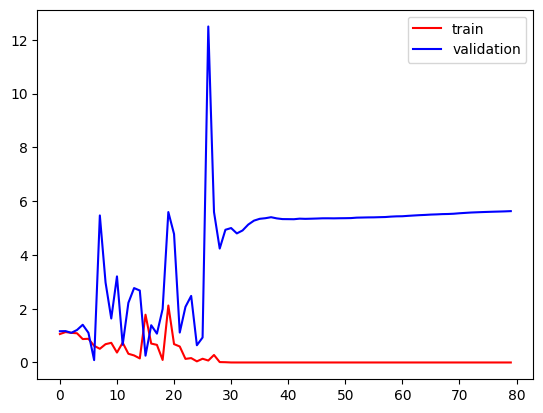

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/test/cat_test/cat_1.jpg')
test_img = cv2.resize(test_img, (255, 255))
test_img = test_img / 255.0
test_input = test_img.reshape((1, 255, 255, 3))
model.predict(test_input)

1/1 [==============================] - 0s 145ms/step


array([[3.8454900e-07, 1.6473024e-03, 9.9835229e-01]], dtype=float32)

In [ ]:
test_img = cv2.imread('/content/test/cow_test/cow_2.jpg')
test_img = cv2.resize(test_img, (255, 255))
test_img = test_img / 255.0
test_input = test_img.reshape((1, 255, 255, 3))
model.predict(test_input)

1/1 [==============================] - 0s 46ms/step


array([[2.7846930e-11, 1.4997292e-08, 1.0000000e+00]], dtype=float32)

In [ ]:
test_img = cv2.imread('/content/test/dog_test/dog_3.jpg')
test_img = cv2.resize(test_img, (255, 255))
test_img = test_img / 255.0
test_input = test_img.reshape((1, 255, 255, 3))
model.predict(test_input)

1/1 [==============================] - 0s 44ms/step


array([[8.6954336e-15, 1.7062132e-05, 9.9998295e-01]], dtype=float32)